In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


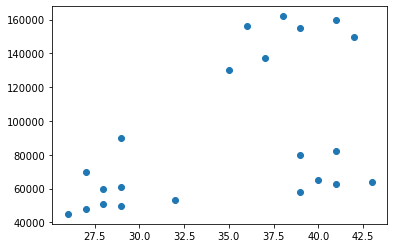

In [4]:
plt.scatter(df.Age,df['Income($)'])

__Kmeans Unscaled__

In [5]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [6]:
#As kmeans is a unsupervised method we do not have any values of y. So we use fit_predict here.
km_pred_notscaled=km.fit_predict(df[['Age','Income($)']]) #all the variables
km_pred_notscaled

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
df['cluster_notscaled']= km_pred_notscaled
df

,Name,Age,Income($),cluster_notscaled
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [8]:
df0 = df[df.cluster_notscaled==0]
df1 = df[df.cluster_notscaled==1]
df2 = df[df.cluster_notscaled==2]

Text(0, 0.5, 'INCOME')

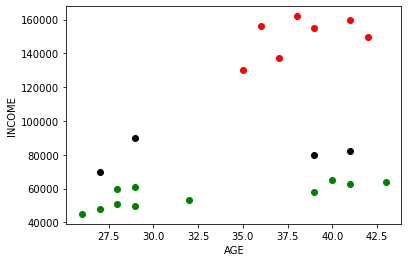

In [9]:
plt.scatter(df0.Age,df0['Income($)'], color='green')
plt.scatter(df1.Age,df1['Income($)'], color='red')
plt.scatter(df2.Age,df2['Income($)'], color='black')

plt.xlabel('AGE')
plt.ylabel('INCOME')

Note: 

    We clearly see data is classified in 3 clusters.
    We see some points are misclassified. What is the reason?
    This happens when the data is not scaled and normalised

__Kmeans Scaled__

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [11]:
df['Income($)']= scaler.fit_transform(df[['Income($)']]) #Scaling and Assigning scaled values to income column
df['Age']= scaler.fit_transform(df[['Age']]) #Scaling and Assigning scaled values to Age column
df

,Name,Age,Income($),cluster_notscaled
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [12]:
km = KMeans(n_clusters = 3)
km_pred_scaled = km.fit_predict((df[['Age','Income($)']]))
km_pred_scaled

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [18]:
km.inertia_ #sum of squared errors (sse of kmeans algo)

0.4750783498553096

In [13]:
df['cluster_scaled']= km_pred_scaled
df

,Name,Age,Income($),cluster_notscaled,cluster_scaled
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,0
5,Gautam,0.764706,0.940171,1,0
6,David,0.882353,0.982906,1,0
7,Andrea,0.705882,1.000000,1,0
8,Brad,0.588235,0.948718,1,0
9,Angelina,0.529412,0.726496,1,0


In [14]:
df0 = df[df.cluster_scaled==0]
df1 = df[df.cluster_scaled==1]
df2 = df[df.cluster_scaled==2]

Text(0, 0.5, 'INCOME')

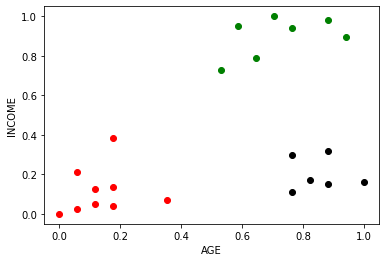

In [15]:
plt.scatter(df0.Age,df0['Income($)'], color='green')
plt.scatter(df1.Age,df1['Income($)'], color='red')
plt.scatter(df2.Age,df2['Income($)'], color='black')

plt.xlabel('AGE')
plt.ylabel('INCOME')

__Kmeans other important features__

In [16]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

Text(0, 0.5, 'INCOME')

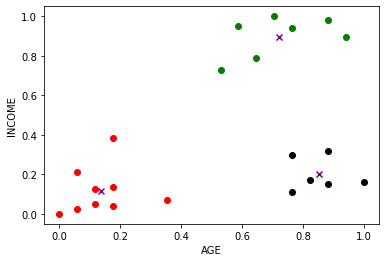

In [17]:
plt.scatter(df0.Age,df0['Income($)'], color='green')
plt.scatter(df1.Age,df1['Income($)'], color='red')
plt.scatter(df2.Age,df2['Income($)'], color='black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color= 'purple', marker = 'x') #plots the centroids.

plt.xlabel('AGE')
plt.ylabel('INCOME')

__Deciding the best value of K__

In [19]:
km.inertia_ #sum of squared errors (sse of kmeans algo)

0.4750783498553096

In [21]:
# Here our goal is to find the values of sse/inertia_ for k = 1 to 10
# we fit the model and find the inertia_/ sse
sse = []
for k in range (1,10):
    km= KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_) # SSE is aslo called as inertia_ in kMeans algo.

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.21055478995472496,
 0.1828178462775364,
 0.14694455440063645,
 0.10740235405674736]

__Plotting the K VS sse.__ # Taking k /n_clusters/no of classses randomly from 1 to 11.

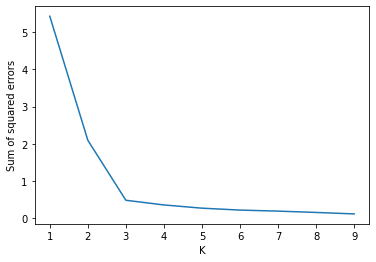

In [23]:
plt.xlabel('K')
plt.ylabel('Sum of squared errors')
plt.plot(range(1,10), sse)